# Regresión Logística

La regresión logística es una herramienta estadística poderosa que nos permite modelar la probabilidad de que ocurra un evento. A diferencia de la regresión lineal, que predice valores numéricos continuos, la regresión logística se enfoca en predecir eventos binarios (sí/no, 1/0).

## ¿Cómo funciona en términos estadísticos?

## Modelo Matemático:

Función Logística: La base de la regresión logística es la función logística, también conocida como función sigmoide. Esta función transforma cualquier valor real en un valor entre 0 y 1, representando una probabilidad. La ecuación es:

$ p = \frac{1}{1 + e^{-z}} $ 

donde:   
p: Probabilidad del evento   
z: Combinación lineal de las variables predictoras y sus coeficientes (similar a la ecuación de la recta en la regresión lineal).

## Combinación Lineal:

z = β0 + β1*X1 + β2*X2 + ... + βn*Xn

donde:
β0: Intercepto
β1, β2, ..., βn: Coeficientes de las variables independientes
X1, X2, ..., Xn: Valores de las variables independientes

## Estimación de Coeficientes:

- Máxima Verosimilitud: El objetivo es encontrar los valores de los coeficientes que maximicen la probabilidad de obtener los datos observados. Esto se logra mediante un proceso iterativo que ajusta los coeficientes hasta encontrar el mejor ajuste.

## Interpretación de Coeficientes:

- Signo: Un coeficiente positivo indica que al aumentar el valor de la variable - independiente correspondiente, aumenta la probabilidad del evento. Un coeficiente negativo indica lo contrario.
- Magnitud: La magnitud del coeficiente refleja la importancia de la variable en la predicción.

## Predicción:

Una vez que tenemos los coeficientes estimados, podemos calcular la probabilidad de que ocurra el evento para nuevos datos. Si la probabilidad es mayor que un umbral determinado (por ejemplo, 0.5), se predice que el evento ocurrirá.

## ¿Por qué la función logística?

- Limita la probabilidad: Asegura que las predicciones siempre estén entre 0 y 1, lo que es ideal para probabilidades.
- No linealidad: Permite modelar relaciones no lineales entre las variables.

## En resumen:
La regresión logística es un modelo estadístico que utiliza una función logística para modelar la probabilidad de un evento binario en función de una o más variables independientes. Al estimar los coeficientes del modelo, podemos entender la importancia de cada variable y hacer predicciones precisas.

In [239]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [240]:
# Load the diabetes dataset
diabetes = load_diabetes()
X=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y=pd.DataFrame(diabetes.target, columns=['diabetes'])
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

<Axes: title={'center': 'Diabetes'}, ylabel='Frequency'>

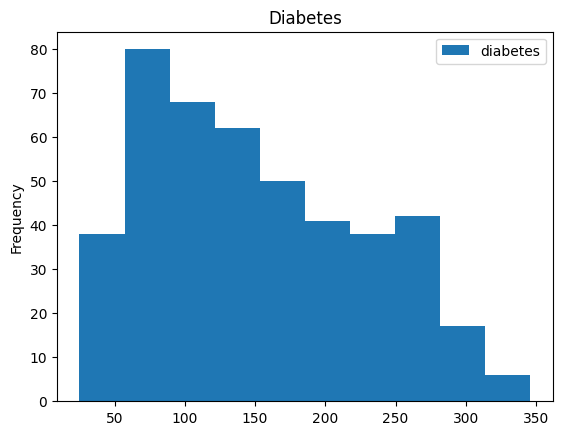

In [241]:
y.plot(kind='hist',  sharex=True, sharey=True, title='Diabetes')

In [242]:
# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > y.median()).astype(int)


<Axes: title={'center': 'Histogram of the target variable'}, ylabel='Frequency'>

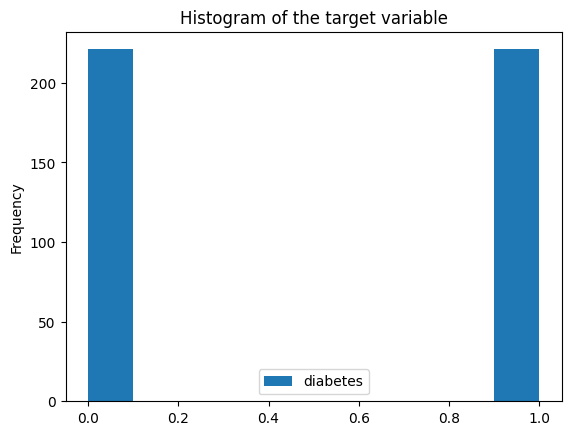

In [243]:
y_binary.plot(kind='hist', title='Histogram of the target variable')

In [244]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [245]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [246]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [247]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



In [248]:
prob=model.predict_proba(X_test)
prob=prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

print("AUC: {:.2f}".format(roc_auc))


AUC: 0.84


In [249]:
intercept=model.intercept_
coef=model.coef_
coef=coef.flatten()
print('Intercept:', intercept)
print('Coeficientes:', coef)


Intercept: [0.12885824]
Coeficientes: [ 0.12482591 -0.58736648  0.7053677   0.57381589 -0.39877459 -0.0066522
 -0.4526476   0.09929332  0.82206576  0.00677229]


In [250]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



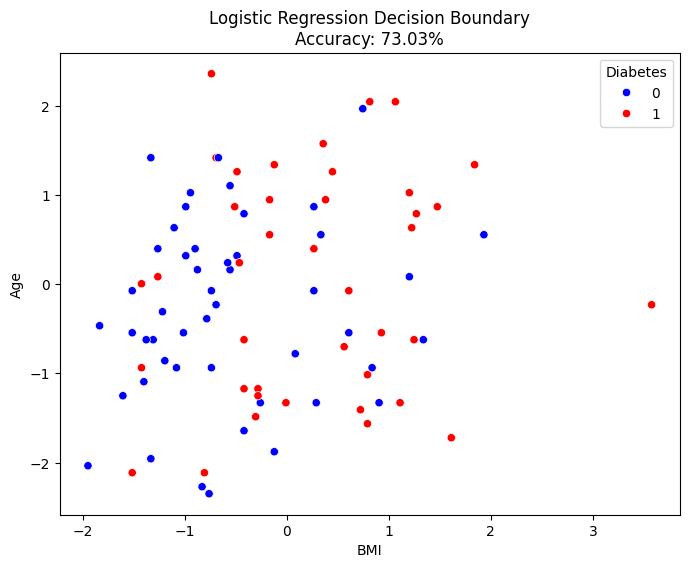

In [251]:
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 0], hue=y_test.to_numpy().ravel(), palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")

plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()


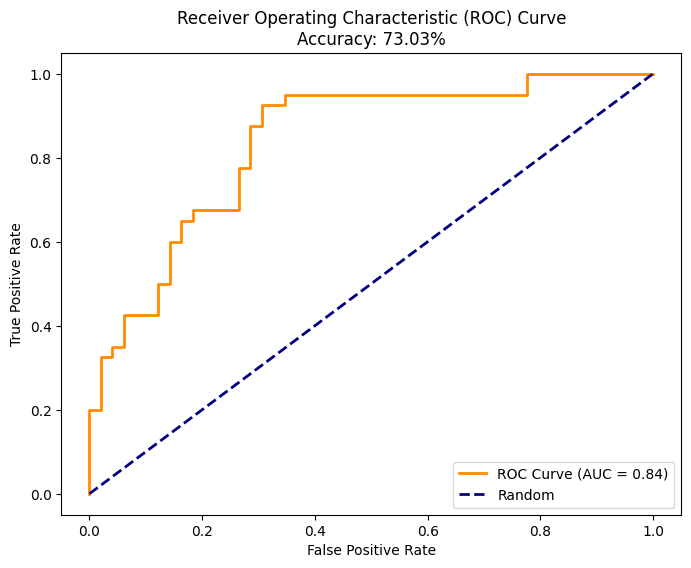

In [252]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()


<Axes: >

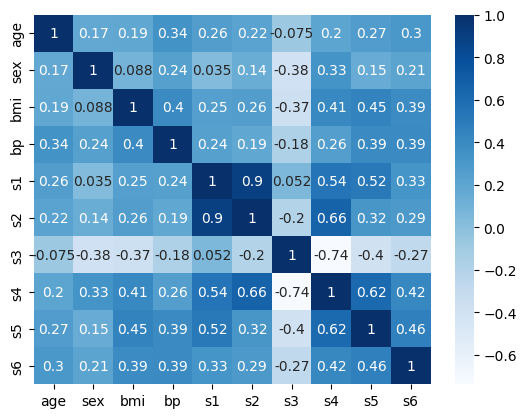

In [253]:
sns.heatmap(X.corr(), annot=True, cmap='Blues')

In [255]:
# Prueba de regularización L1 (Lasso) y L2 (Ridge)
for reg in ['l1', 'l2','elasticnet']:
    for solver in ['saga', 'liblinear','lbfgs']:
        for c in np.arange(0,1,0.1):
            try:
                model = LogisticRegression(penalty=reg, solver=solver, C=c)
                model.fit(X_train, y_train)
                print(f'Regularización {reg} y solver {solver}:', accuracy_score(y_test, model.predict(X_test)))
            except:
                print(f'Error con regularización {reg} , C {c} y solver {solver}')
                

Error con regularización l1 , C 0.0 y solver saga
Regularización l1 y solver saga: 0.7528089887640449
Regularización l1 y solver saga: 0.7303370786516854
Regularización l1 y solver saga: 0.7191011235955056
Regularización l1 y solver saga: 0.7191011235955056
Regularización l1 y solver saga: 0.7303370786516854
Regularización l1 y solver saga: 0.7303370786516854
Regularización l1 y solver saga: 0.7303370786516854
Regularización l1 y solver saga: 0.7303370786516854
Regularización l1 y solver saga: 0.7303370786516854
Error con regularización l1 , C 0.0 y solver liblinear
Regularización l1 y solver liblinear: 0.7528089887640449
Regularización l1 y solver liblinear: 0.7191011235955056
Regularización l1 y solver liblinear: 0.7191011235955056
Regularización l1 y solver liblinear: 0.7191011235955056
Regularización l1 y solver liblinear: 0.7078651685393258
Regularización l1 y solver liblinear: 0.7078651685393258
Regularización l1 y solver liblinear: 0.7078651685393258
Regularización l1 y solver l

c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Regularización l2 y solver lbfgs: 0.7191011235955056
Regularización l2 y solver lbfgs: 0.7191011235955056
Regularización l2 y solver lbfgs: 0.7303370786516854
Error con regularización elasticnet , C 0.0 y solver saga
Error con regularización elasticnet , C 0.1 y solver saga
Error con regularización elasticnet , C 0.2 y solver saga
Error con regularización elasticnet , C 0.30000000000000004 y solver saga
Error con regularización elasticnet , C 0.4 y solver saga
Error con regularización elasticnet , C 0.5 y solver saga
Error con regularización elasticnet , C 0.6000000000000001 y solver saga
Error con regularización elasticnet , C 0.7000000000000001 y solver saga
Error con regularización elasticnet , C 0.8 y solver saga
Error con regularización elasticnet , C 0.9 y solver saga
Error con regularización elasticnet , C 0.0 y solver liblinear
Error con regularización elasticnet , C 0.1 y solver liblinear
Error con regularización elasticnet , C 0.2 y solver liblinear
Error con regularización e

c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ronal\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_complementary-EWj8ilj5-py3.11\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
